**Ahmad Naufal Luthfan Marzuqi** - **202210370311072** - **Pemodelan dan Simulasi Data B**

**TUJUAN**

Laporan ini merangkum hasil simulasi perpindahan panas berdasarkan tugas yang diberikan, yaitu:
1.   Mengubah laju pendinginan dan mengamati efeknya pada penurunan suhu
2.   Mensimulasikan pemanasan,
3.   Menggunakan dataset cuaca dunia nyata untuk simulasi perubahan suhu, dan
4. Membandingkan CES (Constant Environment Simulation) dengan DES (Dynamic Environment Simulation)




1. Laju Pendinginan

Hasil simulasi menunjukkan bahwa jika kecepatan pendinginan lebih besar suhu benda lebih cepat turun mendekati suhu lingkungan dibandingkan saat kecepatan pendinginannya lebih kecil.

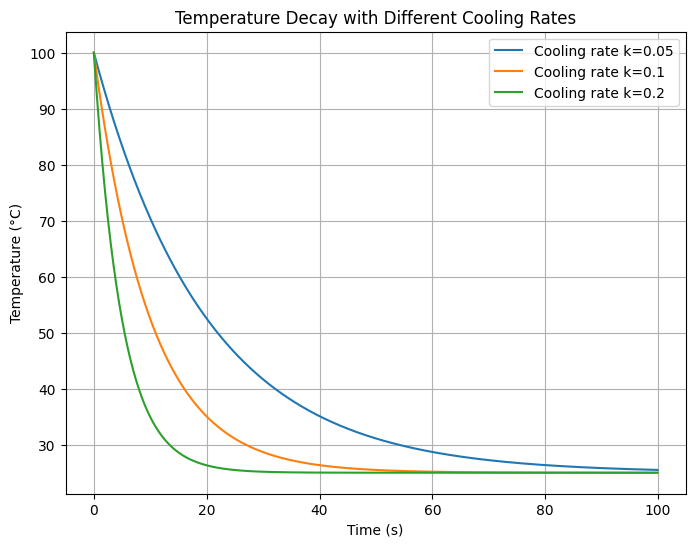

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T_init = 100.0
T_env = 25.0
t_max = 100.0
dt = 0.1
time = np.arange(0, t_max, dt)

cooling_rates = [0.05, 0.1, 0.2]

plt.figure(figsize=(8, 6))
for k in cooling_rates:
    T = T_init
    temperatures = []

    for t in time:
        temperatures.append(T)
        dT_dt = -k * (T - T_env)
        T += dT_dt * dt

    plt.plot(time, temperatures, label=f'Cooling rate k={k}')

plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Decay with Different Cooling Rates')
plt.legend()
plt.grid()
plt.show()

2. Pemanasan

Simulasi dilakukan untuk benda yang dipanaskan, bukan didinginkan. Suhu benda naik perlahan menuju suhu target 100°C, dan kecepatan kenaikan suhu tergantung pada nilai yang digunakan untuk laju pemanasan.

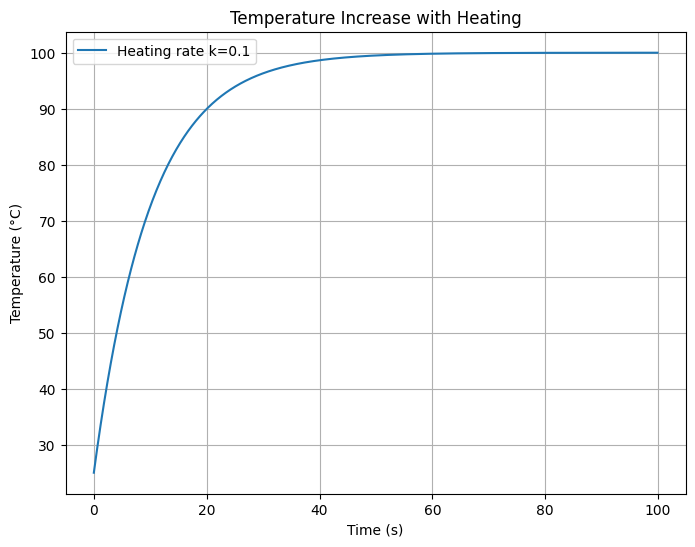

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T_init = 25.0
T_source = 100.0
t_max = 100.0
dt = 0.1
time = np.arange(0, t_max, dt)

heating_rate = 0.1

T = T_init
temperatures = []

for t in time:
    temperatures.append(T)
    dT_dt = heating_rate * (T_source - T)
    T += dT_dt * dt

plt.figure(figsize=(8, 6))
plt.plot(time, temperatures, label=f'Heating rate k={heating_rate}')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Increase with Heating')
plt.legend()
plt.grid()
plt.show()

3. Dataset Cuaca

Menggunakan data suhu dari 1 sampai 14 April 2006, suhu benda disimulasikan dengan lingkungan yang suhunya berubah-ubah. Suhu benda mengikuti pola suhu lingkungan, tapi dengan sedikit keterlambatan, menunjukkan bagaimana benda bereaksi terhadap perubahan suhu harian.

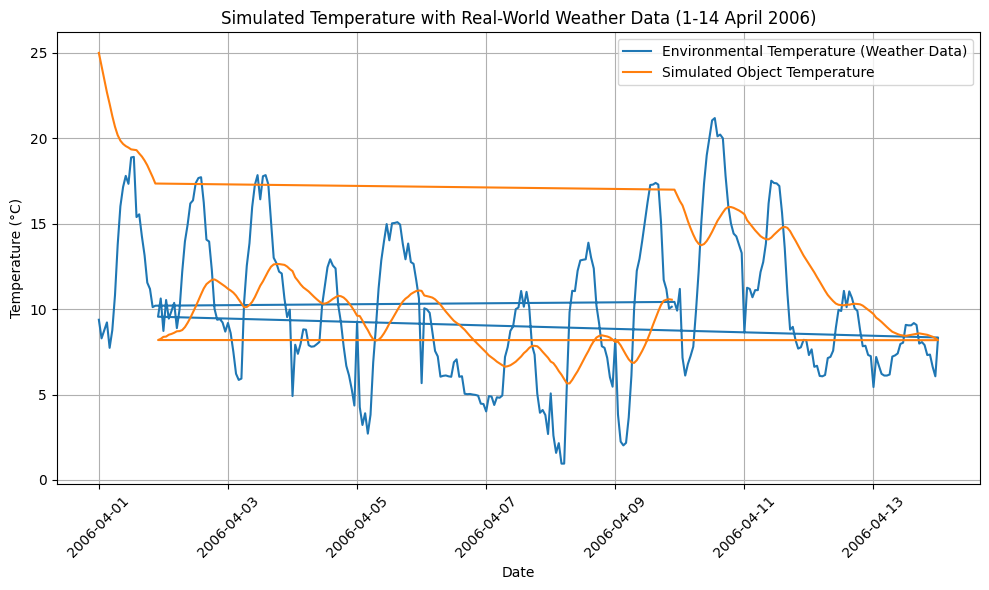

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('weatherHistory.csv')

data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

start_date = '2006-04-01'
end_date = '2006-04-14'
weather_data = data[(data['Formatted Date'] >= start_date) & (data['Formatted Date'] <= end_date)]

T_init = 25.0
k = 0.05
dt = 1.0
time = np.arange(len(weather_data))

T = T_init
simulated_temps = []

for i in range(len(time)):
    T_env = weather_data['Temperature (C)'].iloc[i]
    simulated_temps.append(T)
    dT_dt = -k * (T - T_env)
    T += dT_dt * dt

plt.figure(figsize=(10, 6))
plt.plot(weather_data['Formatted Date'], weather_data['Temperature (C)'], label='Environmental Temperature (Weather Data)')
plt.plot(weather_data['Formatted Date'], simulated_temps, label='Simulated Object Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Simulated Temperature with Real-World Weather Data (1-14 April 2006)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. CES VS DES

Simulasi CES menggunakan suhu lingkungan tetap (rata-rata suhu 11.5°C), sehingga suhu benda stabil mendekati nilai itu. Sementara itu, simulasi DES menggunakan suhu lingkungan yang berubah-ubah dari data cuaca, sehingga suhu benda juga ikut berfluktuasi mengikuti perubahan suhu lingkungan.1

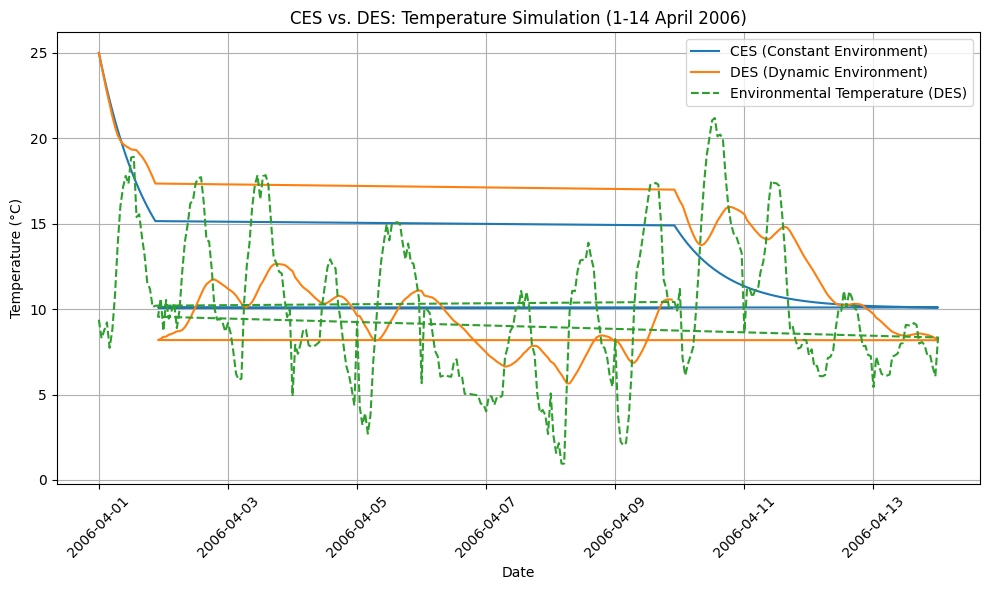

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca dataset
data = pd.read_csv('weatherHistory.csv')

# Mengonversi kolom 'Formatted Date' ke datetime
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

# Mengambil sampel data dari 1 April 2006 hingga 14 April 2006
start_date = '2006-04-01'
end_date = '2006-04-14'
weather_data = data[(data['Formatted Date'] >= start_date) & (data['Formatted Date'] <= end_date)]

# Parameter simulasi
T_init = 25.0  # Suhu awal benda
k = 0.05       # Konstanta pendinginan/pemanasan
dt = 1.0       # Langkah waktu (1 jam)
time = np.arange(len(weather_data))

# CES: Suhu lingkungan konstan (rata-rata suhu dari data)
T_env_constant = weather_data['Temperature (C)'].mean()  # Rata-rata suhu
T_ces = T_init
ces_temps = []

for i in range(len(time)):
    ces_temps.append(T_ces)
    dT_dt = -k * (T_ces - T_env_constant)
    T_ces += dT_dt * dt

# DES: Suhu lingkungan dinamis (dari data cuaca)
T_des = T_init
des_temps = []

for i in range(len(time)):
    T_env = weather_data['Temperature (C)'].iloc[i]  # Suhu lingkungan dinamis
    des_temps.append(T_des)
    dT_dt = -k * (T_des - T_env)
    T_des += dT_dt * dt

# Plot perbandingan
plt.figure(figsize=(10, 6))
plt.plot(weather_data['Formatted Date'], ces_temps, label='CES (Constant Environment)')
plt.plot(weather_data['Formatted Date'], des_temps, label='DES (Dynamic Environment)')
plt.plot(weather_data['Formatted Date'], weather_data['Temperature (C)'], '--', label='Environmental Temperature (DES)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('CES vs. DES: Temperature Simulation (1-14 April 2006)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()